In [1]:
ukraineMapsLink="https://github.com/Joaquin-TC/geodfprepro/raw/main/maps%20and%20data/UcraniaMapa.gpkg"

from  fiona import listlayers


#layers in maps
listlayers(ukraineMapsLink)

['ucrania', 'regiones', 'ciudades', 'capitales', 'hidrografia']

In [2]:
# leeremos la data:

import os
os.environ['USE_PYGEOS'] = '0'

import geopandas as gpd

ucrania=gpd.read_file(ukraineMapsLink,layer='ucrania')
regiones=gpd.read_file(ukraineMapsLink,layer='regiones')
ciudades=gpd.read_file(ukraineMapsLink,layer='ciudades')
capitales=gpd.read_file(ukraineMapsLink,layer='capitales')
hidrografia=gpd.read_file(ukraineMapsLink,layer='hidrografia')

In [3]:
import pandas as pd 
infoseaports=pd.read_csv(os.path.join("data","UpdatedPub150.csv"))

#vemos que hay muchas columnas, nos quedaremos con algunas solamente
infoseaports.columns.to_list()

['World Port Index Number',
 'Region Name',
 'Main Port Name',
 'Alternate Port Name',
 'UN/LOCODE',
 'Country Code',
 'World Water Body',
 'IHO S-130 Sea Area',
 'Sailing Direction or Publication',
 'Publication Link',
 'Standard Nautical Chart',
 'IHO S-57 Electronic Navigational Chart',
 'IHO S-101 Electronic Navigational Chart',
 'Digital Nautical Chart',
 'Tidal Range (m)',
 'Entrance Width (m)',
 'Channel Depth (m)',
 'Anchorage Depth (m)',
 'Cargo Pier Depth (m)',
 'Oil Terminal Depth (m)',
 'Liquified Natural Gas Terminal Depth (m)',
 'Maximum Vessel Length (m)',
 'Maximum Vessel Beam (m)',
 'Maximum Vessel Draft (m)',
 'Offshore Maximum Vessel Length (m)',
 'Offshore Maximum Vessel Beam (m)',
 'Offshore Maximum Vessel Draft (m)',
 'Harbor Size',
 'Harbor Type',
 'Harbor Use',
 'Shelter Afforded',
 'Entrance Restriction - Tide',
 'Entrance Restriction - Heavy Swell',
 'Entrance Restriction - Ice',
 'Entrance Restriction - Other',
 'Overhead Limits',
 'Underkeel Clearance Manage

In [4]:
#Cambiamos el nombre de las columnas
infoseaports.rename(columns={'Main Port Name':'name'},inplace=True)
infoseaports.rename(columns={'Country Code':'CountryCode'},inplace=True)

In [5]:
infoseaports=infoseaports.loc[:,['name', 'CountryCode','Latitude', 'Longitude']]
infoseaports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3774 entries, 0 to 3773
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         3774 non-null   object 
 1   CountryCode  3774 non-null   object 
 2   Latitude     3774 non-null   float64
 3   Longitude    3774 non-null   float64
dtypes: float64(2), object(2)
memory usage: 118.1+ KB


In [6]:
seaports=gpd.GeoDataFrame(data=infoseaports.copy(),
                 geometry=gpd.points_from_xy(infoseaports.Longitude,
                                             infoseaports.Latitude), 
                 crs=4326)#le ponemos alguna proyección

seaports_ukr=seaports[seaports['CountryCode']=='Ukraine'].copy()

seaports_ukr.reset_index(drop=True, inplace=True)

seaports_ukr_6381=seaports_ukr.to_crs(6381) # proyectamos correctamente

In [7]:
#Observamos que Ukraina tiene puertos marinos
seaports[seaports.CountryCode=='Ukraine']

name CountryCode   Latitude  Longitude  \
39               Kyrylivka     Ukraine  46.350000  35.366667   
57               Henichesk     Ukraine  46.166667  34.816667   
92               Balaklava     Ukraine  44.500000  33.600000   
93                 Alushta     Ukraine  44.683333  34.416667   
183                  Sudak     Ukraine  44.850000  34.983333   
425            Ust-Dunaisk     Ukraine  45.466667  29.700000   
1104              Mariupol     Ukraine  47.083333  37.566667   
1105             Berdyansk     Ukraine  46.750000  36.783333   
1148             Mykolayiv     Ukraine  46.950000  31.983333   
1180               Izmayil     Ukraine  45.333333  28.850000   
1211                  Reni     Ukraine  45.433333  28.300000   
1458               Kherson     Ukraine  46.616667  32.600000   
1459                 Odesa     Ukraine  46.483333  30.733333   
1671         Dnipro-Buzkyy     Ukraine  46.733333  31.883333   
1673                Khorly     Ukraine  46.083333  33.283333   
1795         Chornomors Ke     Ukraine  45.516667  32.700000   
2312                 Kerch     Ukraine  45.350000  36.483333   
2313             Feodosiya     Ukraine  45.016667  35.433333   
2314            Illichivsk     Ukraine  46.300000  30.650000   
2329  Belgorod-Dnestrovsky     Ukraine  46.183333  30.366667   
2338        Port Oktyabrsk     Ukraine  46.833333  31.933333   
2725           Yevpatoriya     Ukraine  45.200000  33.383333   
2757                 Yalta     Ukraine  44.483333  34.166667   
2803               Yuzhnyy     Ukraine  46.600000  31.016667   
2832             Skadovs'k     Ukraine  46.100000  32.916667   
2881            Sevastopol     Ukraine  44.616667  33.533333   

                       geometry  
39    POINT (35.36667 46.35000)  
57    POINT (34.81667 46.16667)  
92    POINT (33.60000 44.50000)  
93    POINT (34.41667 44.68333)  
183   POINT (34.98333 44.85000)  
425   POINT (29.70000 45.46667)  
1104  POINT (37.56667 47.08333)  
1105  POINT (36.78333 46.75000)  
1148  POINT (31.98333 46.95000)  
1180  POINT (28.85000 45.33333)  
1211  POINT (28.30000 45.43333)  
1458  POINT (32.60000 46.61667)  
1459  POINT (30.73333 46.48333)  
1671  POINT (31.88333 46.73333)  
1673  POINT (33.28333 46.08333)  
1795  POINT (32.70000 45.51667)  
2312  POINT (36.48333 45.35000)  
2313  POINT (35.43333 45.01667)  
2314  POINT (30.65000 46.30000)  
2329  POINT (30.36667 46.18333)  
2338  POINT (31.93333 46.83333)  
2725  POINT (33.38333 45.20000)  
2757  POINT (34.16667 44.48333)  
2803  POINT (31.01667 46.60000)  
2832  POINT (32.91667 46.10000)  
2881  POINT (33.53333 44.61667)

In [8]:
#Ejercicio 1
infoairports=pd.read_csv(os.path.join("data","ua-airports.csv"))

#al igual que el otro caso, este también tiene muchas columnas
infoairports.columns.to_list()

['id',
 'ident',
 'type',
 'name',
 'latitude_deg',
 'longitude_deg',
 'elevation_ft',
 'continent',
 'country_name',
 'iso_country',
 'region_name',
 'iso_region',
 'local_region',
 'municipality',
 'scheduled_service',
 'gps_code',
 'iata_code',
 'local_code',
 'home_link',
 'wikipedia_link',
 'keywords',
 'score',
 'last_updated']

In [9]:
#Cambiaremos el nombre de las columnas y solo nos quedaremos con algunas
#Cambiamos el nombre de las columnas
infoairports.rename(columns={'name':'airportName'},inplace=True)
infoairports.rename(columns={'country_name':'Country'},inplace=True)
infoairports=infoairports.loc[:,['airportName', 'Country','latitude_deg', 'longitude_deg']]
infoairports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   airportName    247 non-null    object 
 1   Country        247 non-null    object 
 2   latitude_deg   247 non-null    float64
 3   longitude_deg  247 non-null    float64
dtypes: float64(2), object(2)
memory usage: 7.8+ KB


In [10]:
infoairports

airportName  Country  latitude_deg  \
0                       Boryspil International Airport  Ukraine     50.345001   
1    Ihor Sikorsky Kyiv International Airport (Zhul...  Ukraine     50.401940   
2                         Odessa International Airport  Ukraine     46.426800   
3                           Lviv International Airport  Ukraine     49.812500   
4                     Simferopol International Airport  Ukraine     45.052200   
..                                                 ...      ...           ...   
242                                   Oreanda Heliport  Ukraine     44.451300   
243                           Pension Wisteria Helipad  Ukraine     44.461824   
244                          Massandra Palace Heliport  Ukraine     44.514500   
245                                     Artek Heliport  Ukraine     44.560590   
246                                   Palmira Airfield  Ukraine     49.763000   

     longitude_deg  
0        30.894699  
1        30.451940  
2        30.676500  
3        23.956100  
4        33.975101  
..             ...  
242      34.129300  
243      34.145346  
244      34.203900  
245      34.307563  
246      32.123000  

[247 rows x 4 columns]

In [11]:
airports=gpd.GeoDataFrame(data=infoairports.copy(),
                 geometry=gpd.points_from_xy(infoairports.longitude_deg,
                                             infoairports.latitude_deg), 
                 crs=4326)

airports_ukr=airports[airports['Country']=='Ukraine'].copy()

airports_ukr.reset_index(drop=True, inplace=True)
#Lo proyectamos correctamente
airports_ukr_6381=airports_ukr.to_crs(6381) 
airports_ukr_6381


airportName  Country  latitude_deg  \
0                       Boryspil International Airport  Ukraine     50.345001   
1    Ihor Sikorsky Kyiv International Airport (Zhul...  Ukraine     50.401940   
2                         Odessa International Airport  Ukraine     46.426800   
3                           Lviv International Airport  Ukraine     49.812500   
4                     Simferopol International Airport  Ukraine     45.052200   
..                                                 ...      ...           ...   
242                                   Oreanda Heliport  Ukraine     44.451300   
243                           Pension Wisteria Helipad  Ukraine     44.461824   
244                          Massandra Palace Heliport  Ukraine     44.514500   
245                                     Artek Heliport  Ukraine     44.560590   
246                                   Palmira Airfield  Ukraine     49.763000   

     longitude_deg                         geometry  
0        30.894699  POINT (1003781.802 5626341.710)  
1        30.451940   POINT (971541.639 5628534.004)  
2        30.676500  POINT (1043729.138 5189358.444)  
3        23.956100   POINT (512870.058 5524313.763)  
4        33.975101  POINT (1322174.059 5073484.910)  
..             ...                              ...  
242      34.129300  POINT (1345282.698 5008706.266)  
243      34.145346  POINT (1346368.815 5010084.753)  
244      34.203900  POINT (1350066.889 5016703.423)  
245      34.307563  POINT (1357460.435 5023187.276)  
246      32.123000  POINT (1100653.888 5574277.340)  

[247 rows x 5 columns]

In [12]:
airports_ukr_6381.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   airportName    247 non-null    object  
 1   Country        247 non-null    object  
 2   latitude_deg   247 non-null    float64 
 3   longitude_deg  247 non-null    float64 
 4   geometry       247 non-null    geometry
dtypes: float64(2), geometry(1), object(2)
memory usage: 9.8+ KB


In [13]:
seaports_ukr_6381.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   name         26 non-null     object  
 1   CountryCode  26 non-null     object  
 2   Latitude     26 non-null     float64 
 3   Longitude    26 non-null     float64 
 4   geometry     26 non-null     geometry
dtypes: float64(2), geometry(1), object(2)
memory usage: 1.1+ KB


In [14]:
seaports_ukr_6381

name CountryCode   Latitude  Longitude  \
0              Kyrylivka     Ukraine  46.350000  35.366667   
1              Henichesk     Ukraine  46.166667  34.816667   
2              Balaklava     Ukraine  44.500000  33.600000   
3                Alushta     Ukraine  44.683333  34.416667   
4                  Sudak     Ukraine  44.850000  34.983333   
5            Ust-Dunaisk     Ukraine  45.466667  29.700000   
6               Mariupol     Ukraine  47.083333  37.566667   
7              Berdyansk     Ukraine  46.750000  36.783333   
8              Mykolayiv     Ukraine  46.950000  31.983333   
9                Izmayil     Ukraine  45.333333  28.850000   
10                  Reni     Ukraine  45.433333  28.300000   
11               Kherson     Ukraine  46.616667  32.600000   
12                 Odesa     Ukraine  46.483333  30.733333   
13         Dnipro-Buzkyy     Ukraine  46.733333  31.883333   
14                Khorly     Ukraine  46.083333  33.283333   
15         Chornomors Ke     Ukraine  45.516667  32.700000   
16                 Kerch     Ukraine  45.350000  36.483333   
17             Feodosiya     Ukraine  45.016667  35.433333   
18            Illichivsk     Ukraine  46.300000  30.650000   
19  Belgorod-Dnestrovsky     Ukraine  46.183333  30.366667   
20        Port Oktyabrsk     Ukraine  46.833333  31.933333   
21           Yevpatoriya     Ukraine  45.200000  33.383333   
22                 Yalta     Ukraine  44.483333  34.166667   
23               Yuzhnyy     Ukraine  46.600000  31.016667   
24             Skadovs'k     Ukraine  46.100000  32.916667   
25            Sevastopol     Ukraine  44.616667  33.533333   

                           geometry  
0   POINT (1405336.698 5236418.258)  
1   POINT (1366695.030 5208397.526)  
2   POINT (1302296.116 5007378.718)  
3   POINT (1363843.500 5038272.413)  
4   POINT (1405518.784 5064492.300)  
5    POINT (980454.487 5073894.209)  
6   POINT (1556680.337 5351496.468)  
7   POINT (1505041.032 5301969.521)  
8   POINT (1135883.406 5260702.436)  
9    POINT (915449.001 5052187.180)  
10   POINT (871327.266 5059222.393)  
11  POINT (1188294.140 5230541.080)  
12  POINT (1047313.434 5196178.421)  
13  POINT (1131655.225 5235574.118)  
14  POINT (1249889.275 5179369.358)  
15  POINT (1214161.455 5109537.517)  
16  POINT (1513161.551 5142005.325)  
17  POINT (1437716.799 5089358.181)  
18  POINT (1043427.095 5175023.067)  
19  POINT (1023157.402 5159421.608)  
20  POINT (1133909.093 5247212.287)  
21  POINT (1273016.638 5082483.822)  
22  POINT (1347674.081 5012753.174)  
23  POINT (1067389.611 5211879.691)  
24  POINT (1221277.538 5176844.654)  
25  POINT (1294970.615 5019516.120)

<Axes: >

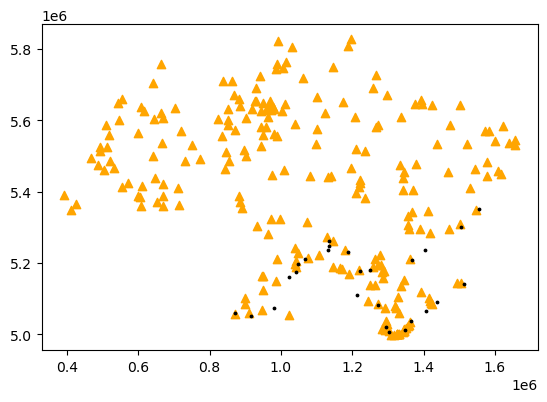

In [15]:
#ahora los graficaremos
base=airports_ukr_6381.plot(color='orange',marker="^")
seaports_ukr_6381.plot(ax=base,color='black', alpha=1,markersize=3)

In [16]:
seaports_ukr_6381.head()

name CountryCode   Latitude  Longitude  \
0  Kyrylivka     Ukraine  46.350000  35.366667   
1  Henichesk     Ukraine  46.166667  34.816667   
2  Balaklava     Ukraine  44.500000  33.600000   
3    Alushta     Ukraine  44.683333  34.416667   
4      Sudak     Ukraine  44.850000  34.983333   

                          geometry  
0  POINT (1405336.698 5236418.258)  
1  POINT (1366695.030 5208397.526)  
2  POINT (1302296.116 5007378.718)  
3  POINT (1363843.500 5038272.413)  
4  POINT (1405518.784 5064492.300)

In [17]:
#Ahora calcularemos la distancia entre los dos primeros puntos de los gdf en km
#Estos son Boryspil International Airport y Kyrylivka
airports_ukr_6381.iloc[0].geometry.distance(seaports_ukr_6381.iloc[0].geometry)/1000

559.7201380700092

In [18]:
#Calculamos las distancias entre cada airport y seaport
seaports_ukr_6381.geometry.apply\
(lambda g: airports_ukr_6381.geometry.distance(g)/1000)

0           1           2            3           4           5    \
0   559.720138  584.750298  364.656898   937.752912  182.929769  227.246018   
1   553.519063  576.767599  323.526590   910.395602  142.068754  247.832940   
2   687.187007  703.727514  316.185868   943.618219   69.030148  449.708176   
3   689.543273  708.737960  353.977674   979.995915   54.555131  417.379058   
4   690.700632  711.673525  382.731370  1004.120274   83.828457  395.524515   
5   552.939785  554.711403  131.664996   649.240305  341.719817  526.667305   
6   617.443680  647.407980  537.966236  1058.019714  363.708153  236.797661   
7   597.057898  625.512561  474.857787  1016.779329  292.652605  222.427849   
8   388.771029  402.875016  116.543443   676.488406  264.110980  284.674718   
9   580.909725  579.069983  187.807745   620.462180  407.282293  588.102706   
10  582.381768  578.064556  216.004160   587.198052  451.072334  616.432153   
11  436.695480  453.188719  150.316497   736.546048  206.374594  273.193456   
12  432.360334  438.945002    7.704497   627.138362  301.001762  393.663075   
13  411.158027  424.327506   99.332197   682.836485  250.140635  305.320035   
14  510.248148  528.418666  206.401996   813.746871  128.205328  291.344497   
15  557.984026  572.906387  188.198181   814.769267  113.870598  369.138259   
16  702.886522  728.053765  471.814697  1070.860781  202.907046  356.034450   
17  690.399082  712.762125  406.480417  1022.021454  116.627979  377.678612   
18  453.056582  459.172831   14.338559   635.212374  296.664570  410.725839   
19  467.321941  471.943458   36.323691   627.327234  311.120679  436.196762   
20  400.839409  414.450771  107.142389   680.054933  256.173572  295.454337   
21  606.851546  623.745121  252.972217   879.224954   49.974318  379.344524   
22  703.386659  721.568877  351.528021   979.077113   65.868011  442.433060   
23  419.314582  427.536724   32.665341   636.480152  289.945220  368.216333   
24  499.351578  516.131076  177.988846   789.034815  144.441492  304.092410   
25  673.073712  689.571668  303.263408   930.860860   60.437221  438.379092   

           6            7           8           9    ...         237  \
0   409.397491  1023.660366  266.553605  745.648828  ...  247.426723   
1   438.265722   990.222043  311.155029  712.969227  ...  211.059080   
2   645.121316   986.240433  516.681170  723.768680  ...   29.852960   
3   608.264756  1032.317910  462.281028  764.642633  ...   49.986742   
4   581.292953  1063.281628  422.807817  792.530033  ...   98.107152   
5   706.678273   666.822102  685.589132  421.846950  ...  358.479698   
6   335.367634  1164.071298  113.044232  886.816941  ...  417.270331   
7   360.704170  1115.268081  166.593791  837.114370  ...  348.098852   
8   464.467537   753.789224  456.183670  476.321122  ...  325.553009   
9   763.480321   621.869504  751.644588  393.282041  ...  419.076432   
10  786.718826   581.279041  785.282122  361.491684  ...  463.732124   
11  464.086700   810.857921  425.677561  534.169388  ...  271.017515   
12  568.722805   682.144933  564.518735  411.194798  ...  344.976258   
13  487.775885   754.359541  471.611116  478.069521  ...  308.546621   
14  488.597483   882.128544  409.429816  607.287359  ...  196.684082   
15  566.064760   867.461151  484.312698  598.874052  ...  160.154318   
16  517.211435  1147.018653  323.364405  870.832997  ...  230.531764   
17  557.928445  1086.843388  389.385541  813.918880  ...  138.745178   
18  587.908039   684.759183  578.215511  416.552562  ...  336.737316   
19  612.582779   670.741910  603.578027  405.931746  ...  346.793330   
20  476.790635   754.278651  464.094374  477.378685  ...  316.096939   
21  576.425661   931.924269  468.040606  663.649310  ...  100.733396   
22  634.768640  1026.230545  492.112502  761.274719  ...   20.552062   
23  544.050035   697.245894  539.415033  423.980508  ...  338.238882   
24  500.251000   854.996044  432.137999  580.812253  ...  208.001012   
25  6

In [19]:
airports_ukr_6381.columns.to_list()

['airportName', 'Country', 'latitude_deg', 'longitude_deg', 'geometry']

In [20]:
#Ahora les agregamos los nombres y los ordenamos
seaports_ukr_6381.set_index('name').geometry.apply\
(lambda g: airports_ukr_6381.set_index('airportName').geometry.distance(g)/1000).\
sort_index(axis=0).sort_index(axis=1)

airportName           Aeroclub Swallow  Aerodrom Belz  Aerodrom Krupske  \
name                                                                      
Alushta                     793.344805    1014.189778        953.813304   
Balaklava                   756.473368     980.946736        915.585308   
Belgorod-Dnestrovsky        440.355431     667.261024        598.316045   
Berdyansk                   844.527379    1034.129326       1000.999267   
Chornomors Ke               627.929841     850.015364        788.212387   
Dnipro-Buzkyy               498.494917     713.301982        659.590342   
Feodosiya                   837.270327    1051.937950        998.397347   
Henichesk                   729.430179     935.758833        889.782531   
Illichivsk                  448.065602     673.281431        607.338387   
Izmayil                     443.647608     670.628865        585.297355   
Kerch                       889.133415    1096.564989       1049.768258   
Kherson                     553.183144     765.426387        714.137775   
Khorly                      629.205629     843.931487        790.326858   
Kyrylivka                   759.179243     960.639546        918.637407   
Mariupol                    890.449589    1071.894894       1044.363651   
Mykolayiv                   493.698005     705.002952        654.497941   
Odesa                       440.143613     663.680723        600.244484   
Port Oktyabrsk              496.393169     709.616025        657.389536   
Reni                        414.581152     639.158017        551.056436   
Sevastopol                  743.728401     967.879547        903.032427   
Skadovs'k                   603.905471     820.257838        765.023902   
Sudak                       818.331829    1036.005491        979.313474   
Ust-Dunaisk                 466.426307     695.555617        616.288609   
Yalta                       792.068949    1014.853180        951.935429   
Yevpatoriya                 692.476627     913.965050        852.861974   
Yuzhnyy                     450.007176     671.102533        610.763015   

airportName           Anan'iv Airstrip  Andrushivka  Artek Heliport  \
name                                                                  
Alushta                     482.865583   726.779793       16.380014   
Balaklava                   455.348951   711.026709       57.384776   
Belgorod-Dnestrovsky        170.126798   440.918327      360.996275   
Berdyansk                   532.265756   688.475123      315.435528   
Chornomors Ke               321.309027   576.431487      167.304996   
Dnipro-Buzkyy               180.549322   426.097273      309.993812   
Feodosiya                   519.573819   744.415044      104.017656   
Henichesk                   409.619441   614.611404      185.440326   
Illichivsk                  162.943366   433.867208      348.813770   
Izmayil                     275.947552   523.381102      442.961739   
Kerch                       569.226562   772.588450      195.858536   
Kherson                     233.787058   466.425801      267.605746   
Khorly                      311.345152   545.892455      189.642814   
Kyrylivka                   440.581746   630.666671      218.539672   
Mariupol                    584.270071   719.387922      384.025383   
Mykolayiv                   173.903820   409.147183      324.822769   
Odesa                       146.079689   416.124104      355.129692   
Port Oktyabrsk              177.314979   418.323876      316.484451   
Reni                        281.848306   514.582290      487.466910   
Sevastopol                  441.682223   696.931283       62.597564   
Skadovs'k                   287.481134   528.412605      205.320168   
Sudak                       503.256716   737.226945       63.369629   
Ust-Dunaisk                 248.247036   511.431974      380.400681   
Yalta                       485.716118   735.231155       14.305356   
Yevpatoriya                 383.799522   633.881730  

In [21]:
seaports_ukr_6381.iloc[0]

name                                             Kyrylivka
CountryCode                                        Ukraine
Latitude                                             46.35
Longitude                                        35.366667
geometry       POINT (1405336.697623667 5236418.258094744)
Name: 0, dtype: object

In [22]:
#Lo relacionamos a una variable
distanceMatrixKM_sea_air= seaports_ukr_6381.set_index('name').geometry.apply\
                          (lambda g: airports_ukr_6381.set_index('airportName').geometry.distance(g)/1000).\
                          sort_index(axis=0).sort_index(axis=1)

In [23]:
#La distancia de un seaport a todos los aeropuertos
distanceMatrixKM_sea_air.mean(axis=1).sort_values(ascending=True)

name
Mykolayiv               372.892895
Port Oktyabrsk          376.172623
Dnipro-Buzkyy           379.317965
Kherson                 384.235610
Yuzhnyy                 390.166449
Odesa                   398.740574
Skadovs'k               405.545644
Illichivsk              408.468591
Khorly                  409.781221
Belgorod-Dnestrovsky    419.408929
Chornomors Ke           434.779477
Henichesk               444.262682
Yevpatoriya             457.736537
Kyrylivka               458.556306
Ust-Dunaisk             476.245767
Sevastopol              499.494761
Balaklava               509.657660
Izmayil                 509.668873
Berdyansk               512.995943
Alushta                 513.366295
Sudak                   521.080072
Yalta                   521.575171
Reni                    522.313310
Feodosiya               527.939146
Mariupol                548.093237
Kerch                   557.511879
dtype: float64

In [24]:
#Mostramos la media, la distancia mínima y máxima
SomeStats=pd.DataFrame()
SomeStats['mean']=distanceMatrixKM_sea_air.mean(axis=1)
SomeStats['min']=distanceMatrixKM_sea_air.min(axis=1)
SomeStats['max']=distanceMatrixKM_sea_air.max(axis=1)
SomeStats.head()

mean        min          max
name                                                    
Alushta               513.366295   3.885283  1032.317910
Balaklava             509.657660   1.224485   993.529179
Belgorod-Dnestrovsky  419.408929  36.323691   739.484540
Berdyansk             512.995943   7.611671  1115.268081
Chornomors Ke         434.779477  35.034855   867.461151

In [25]:
#Aquí mostramos los aeropuertos más lejanos a cada seaport
distanceMatrixKM_sea_air.idxmax(axis="columns")

name
Alushta                 Uzhhorod International Airport
Balaklava                         Zhovtneve Air Base 2
Belgorod-Dnestrovsky            Gostra Mogila Airfield
Berdyansk               Uzhhorod International Airport
Chornomors Ke           Uzhhorod International Airport
Dnipro-Buzkyy           Uzhhorod International Airport
Feodosiya               Uzhhorod International Airport
Henichesk               Uzhhorod International Airport
Illichivsk                      Gostra Mogila Airfield
Izmayil                         Gostra Mogila Airfield
Kerch                   Uzhhorod International Airport
Kherson                 Uzhhorod International Airport
Khorly                  Uzhhorod International Airport
Kyrylivka               Uzhhorod International Airport
Mariupol                Uzhhorod International Airport
Mykolayiv               Uzhhorod International Airport
Odesa                           Gostra Mogila Airfield
Port Oktyabrsk          Uzhhorod International Airport
Reni 

In [26]:
#los seaports más lejanos a cada aeropuerto son:
distanceMatrixKM_sea_air.idxmax(axis="rows")

airportName
Aeroclub Swallow           Mariupol
Aerodrom Belz                 Kerch
Aerodrom Krupske              Kerch
Anan'iv Airstrip           Mariupol
Andrushivka                   Kerch
                             ...   
Zhovti Vody Airstrip           Reni
Zhovtneve Air Base         Mariupol
Zhovtneve Air Base 2          Kerch
Zhytomyr Airport              Kerch
Zmiyinyy Island Helipad    Mariupol
Length: 247, dtype: object

In [27]:
#los aeropuertos más cercanos a cada seaport
distanceMatrixKM_sea_air.idxmin(axis="columns")

name
Alushta                                    Profug Heliport
Balaklava                     Demetrynskaya Street Helipad
Belgorod-Dnestrovsky          Odessa International Airport
Berdyansk                                Berdyansk Airport
Chornomors Ke                            Donuzlav Air Base
Dnipro-Buzkyy                             Ochakiv Air Base
Feodosiya                        Gora Klementyeva Airfield
Henichesk                               Genichesk Air Base
Illichivsk                    Odessa International Airport
Izmayil                       Izmail International Airport
Kerch                                        Kerch Airport
Kherson                      Kherson International Airport
Khorly                                  Pryvillia Airfield
Kyrylivka                               Genichesk Air Base
Mariupol                    Mariupol International Airport
Mykolayiv                               Kulbakyne Air Base
Odesa                         Odessa International 

In [28]:
#el seaport más cercano a cada aeropuerto
distanceMatrixKM_sea_air.idxmin(axis="rows")

airportName
Aeroclub Swallow                  Reni
Aerodrom Belz                     Reni
Aerodrom Krupske                  Reni
Anan'iv Airstrip               Yuzhnyy
Andrushivka                  Mykolayiv
                              ...     
Zhovti Vody Airstrip         Mykolayiv
Zhovtneve Air Base             Izmayil
Zhovtneve Air Base 2              Reni
Zhytomyr Airport             Mykolayiv
Zmiyinyy Island Helipad    Ust-Dunaisk
Length: 247, dtype: object

In [29]:
mins=distanceMatrixKM_sea_air.idxmin(axis="columns")
mins

name
Alushta                                    Profug Heliport
Balaklava                     Demetrynskaya Street Helipad
Belgorod-Dnestrovsky          Odessa International Airport
Berdyansk                                Berdyansk Airport
Chornomors Ke                            Donuzlav Air Base
Dnipro-Buzkyy                             Ochakiv Air Base
Feodosiya                        Gora Klementyeva Airfield
Henichesk                               Genichesk Air Base
Illichivsk                    Odessa International Airport
Izmayil                       Izmail International Airport
Kerch                                        Kerch Airport
Kherson                      Kherson International Airport
Khorly                                  Pryvillia Airfield
Kyrylivka                               Genichesk Air Base
Mariupol                    Mariupol International Airport
Mykolayiv                               Kulbakyne Air Base
Odesa                         Odessa International 

In [30]:
matrix1=airports_ukr_6381[airports_ukr_6381.airportName.str.contains('Profug Heliport')]
matrix1

airportName  Country  latitude_deg  longitude_deg  \
181  Profug Heliport  Ukraine       44.6511        34.3995   

                            geometry  
181  POINT (1363082.450 5034462.396)

In [31]:
distanceMatrixKM_sea_air2= matrix1.set_index('airportName').geometry.apply\
                          (lambda g: seaports_ukr_6381.set_index('name').geometry.distance(g)/1000).\
                          sort_index(axis=0).sort_index(axis=1)
distanceMatrixKM_sea_air2

name              Alushta  Balaklava  Belgorod-Dnestrovsky   Berdyansk  \
airportName                                                              
Profug Heliport  3.885283  66.547006            362.165491  302.840388   

name             Chornomors Ke  Dnipro-Buzkyy  Feodosiya   Henichesk  \
airportName                                                            
Profug Heliport     166.774508     306.601509  92.648979  173.972642   

name             Illichivsk     Izmayil  ...       Odesa  Port Oktyabrsk  \
airportName                              ...                               
Profug Heliport  349.194571  447.984232  ...  354.770551      312.702644   

name                   Reni  Sevastopol  Skadovs'k      Sudak  Ust-Dunaisk  \
airportName                                                                  
Profug Heliport  492.378126    69.73244  200.95109  51.986898   384.654424   

name                 Yalta  Yevpatoriya     Yuzhnyy  
airportName                                          
Profug Heliport  26.621573   102.068153  344.834963  

[1 rows x 26 columns]

In [32]:
mins2=distanceMatrixKM_sea_air2.idxmin(axis="columns")
mins2

airportName
Profug Heliport    Alushta
dtype: object

In [33]:
base=seaports_ukr_6381[seaports_ukr_6381.name.str.contains('Alushta')].explore(color='red', marker_kwds=dict(radius=10))
# Los más cercanos los graficamos de rojo
airports_ukr_6381[airports_ukr_6381.airportName.str.contains('Profug Heliport')].explore(m=base,color='orange',marker_kwds=dict(radius=10))

In [34]:
base=seaports_ukr_6381.explore(color='black')
# Los más cercanos los graficamos de rojo
airports_ukr_6381[airports_ukr_6381.airportName.isin(mins)].explore(m=base,color='red',marker_kwds=dict(radius=5))

In [35]:
#Ejercicio 2

In [36]:
#Proyectamos los ríos de Ukrania
rios_ukr_638=hidrografia.to_crs(6381)

In [37]:
#Elegimos Dniester
rios_ukr_638[rios_ukr_638.NOMBRE.str.contains('Dniester')]

NOMBRE                                           geometry
1  Dniester  MULTILINESTRING ((438289.939 5451514.632, 4388...

In [38]:
#La distancia de este río a cada aeropuerto
rios_ukr_638[rios_ukr_638.NOMBRE.str.contains('Dniester')].iloc[0].geometry.distance(airports_ukr_6381.geometry)


0      298950.269541
1      285244.694554
2       26821.563990
3       33079.935095
4      299062.748885
           ...      
242    343141.629965
243    343553.914334
244    344256.551363
245    348603.611371
246    324698.730739
Name: geometry, Length: 247, dtype: float64

In [39]:
#Ahora calculamos las distancias de cada río a cada aeropuerto
distanceMatrixKM_riv_air=rios_ukr_638.set_index('NOMBRE').geometry.apply\
(lambda g: airports_ukr_6381.set_index('airportName').geometry.distance(g)/1000).\
sort_index(axis=0).sort_index(axis=1)
distanceMatrixKM_riv_air

airportName       Aeroclub Swallow  Aerodrom Belz  Aerodrom Krupske  \
NOMBRE                                                                
Danubio                 407.999649     632.247250        543.874886   
Desna                   382.177146     470.641629        484.839850   
Dnieper                 373.875873     467.101601        482.226685   
Dniester                 18.104121      93.768252          0.377571   
Goryn'                  115.109010     127.965349        115.282369   
Ingulets                487.601614     654.449467        633.790777   
Oskol                   840.819137     983.994124        978.648601   
Pripyat'                327.510191     113.246762        216.387579   
Prut                     52.381487     210.387808        111.110932   
Psel                    555.033283     705.887710        695.023596   
San                     230.336367     155.934215         92.499855   
Severskiy Donets        784.525232     913.468887        915.137995   
Severskiy Donets        763.005930     896.641331        895.810276   
Seym                    554.872421     618.448404        646.907164   
Siret                    73.919385     264.437345        172.008606   
Sluch'                  101.211413     186.567308        168.609472   
Sozh                    491.375632     513.459599        556.617447   
Teterev                 175.510691     291.815210        283.423652   
Tisza                   135.049293     228.107539        124.968076   
Yuzhnyy Bug              94.334707     222.173887        196.552821   

airportName       Anan'iv Airstrip  Andrushivka  Artek Heliport  \
NOMBRE                                                            
Danubio                 253.631286   510.502830      373.466037   
Desna                   323.927387   127.767829      729.201288   
Dnieper                 227.335477   121.050347      258.293189   
Dniester                125.188152   193.572835      348.603611   
Goryn'                  355.113162   151.396486      840.888001   
Ingulets                227.119223   301.360137      266.805581   
Oskol                   581.082689   622.472554      566.833768   
Pripyat'                392.476892   165.464640      794.885748   
Prut                    259.800391   264.297564      724.552252   
Psel                    307.191492   344.846463      504.946536   
San                     545.589244   453.473921     1005.665102   
Severskiy Donets        549.373513   554.240391      617.557949   
Severskiy Donets        522.623548   536.234459      557.992308   
Seym                    462.393552   300.587909      747.324582   
Siret                   296.072825   312.810433      745.891645   
Sluch'                  295.909175    87.767553      778.819171   
Sozh                    482.526535   252.962676      869.432884   
Teterev                 278.245869    25.819882      756.078724   
Tisza                   424.216362   388.568809      870.786768   
Yuzhnyy Bug              52.377391    76.545789      340.757865   

airportName       Artsyz Air Base  Askaniya-Nova Airport  Bagerovo Air Base  \
NOMBRE                                                                        
Danubio                 55.227880             340.760976         517.500357   
Desna                  522.271359             519.087731         718.418031   
Dnieper                244.256486              45.679276         245.030655   
Dniester                80.577930             252.282810         459.011459   
Goryn'                 500.454242             659.148636         884.451658   
Ingulets               275.681233              76.432126         305.117741   
Oskol                  708.732756             414.236759         427.135848   
Pripyat'               590.173258             583.238683         776.786636   
Prut                   331.944284             578.475458         806.472802   
Psel                   468.107001             292.459425         456.427581   
San           

In [40]:
#La distancia de cada aeropuerto al mismo río
distanceMatrixKM_riv_air.loc['Dniester'].sort_values()

airportName
Aerodrom Krupske                           0.377571
Sambir Air Base                            1.161449
Pidverbtsi Airstrip                        2.585549
Liubsha Air Base                           4.498998
Pogorelovka Airstrip                       7.607976
                                            ...    
Sievierodonetsk Airport                  685.760232
Luhansk Aviation Sports Club Airfield    712.953957
Luhansk International Airport            726.152312
Dmitrievka Airfield                      727.602941
Gostra Mogila Airfield                   731.275229
Name: Dniester, Length: 247, dtype: float64

In [41]:
#Graficamos el río y los aeropuertos
base=rios_ukr_638[rios_ukr_638.NOMBRE.str.contains('Dniester')].explore()
airports_ukr_6381.explore(m=base,color='red',marker_kwds=dict(radius=10))

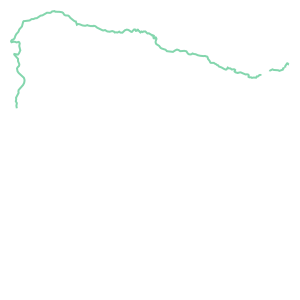

In [42]:
#Creamos dos sistemas
SYSTEM1 = rios_ukr_638.iloc[2:3]
SYSTEM1.unary_union

<Axes: >

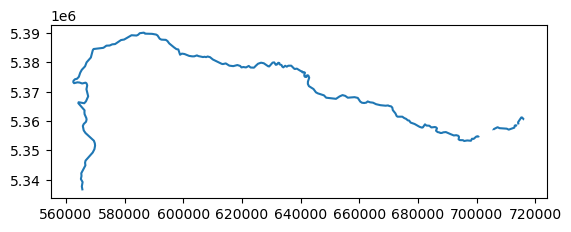

In [43]:
SYSTEM1.plot()

In [44]:
SYSTEM2 = rios_ukr_638.iloc[7:10]
type(SYSTEM2.unary_union)

shapely.geometry.multilinestring.MultiLineString

<Axes: >

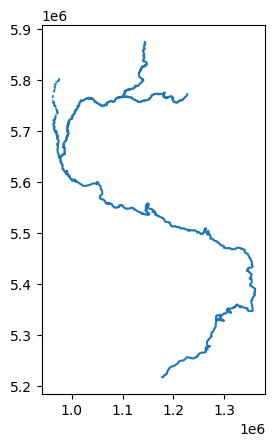

In [45]:
SYSTEM2.plot()

In [46]:
#Los unimos y creamos sus hulls
SYSTEM2_hull=gpd.GeoSeries(SYSTEM2.unary_union.convex_hull)

In [47]:
SYSTEM1_hull=gpd.GeoSeries(SYSTEM1.unary_union.convex_hull)

<Axes: >

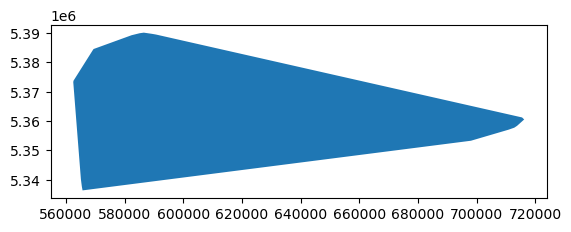

In [48]:
SYSTEM1_hull.plot()

<Axes: >

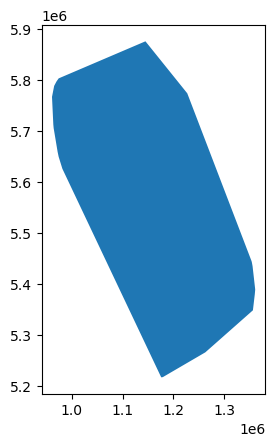

In [49]:
SYSTEM2_hull.plot()

In [50]:
#Ahora calculamos su distancia a cada aeropuerto
distanceMatrixKM_sys_air=SYSTEM1.set_index('NOMBRE').geometry.apply\
(lambda g: airports_ukr_6381.set_index('airportName').geometry.distance(g)/1000).\
sort_index(axis=0).sort_index(axis=1)

distanceMatrixKM_sys_air

airportName  Aeroclub Swallow  Aerodrom Belz  Aerodrom Krupske  \
NOMBRE                                                           
Prut                52.381487     210.387808        111.110932   

airportName  Anan'iv Airstrip  Andrushivka  Artek Heliport  Artsyz Air Base  \
NOMBRE                                                                        
Prut               259.800391   264.297564      724.552252       331.944284   

airportName  Askaniya-Nova Airport  Bagerovo Air Base  Bekhtery Airfield  ...  \
NOMBRE                                                                    ...   
Prut                    578.475458         806.472802         487.619584  ...   

airportName  Zabroshennyy Airport  Zahnitkiv Airstrip  \
NOMBRE                                                  
Prut                    281.44973          174.939219   

airportName  Zaporizhzhia International Airport  Zavodskoe Airfield  \
NOMBRE                                                                
Prut                                 655.195021          684.780699   

airportName  Zhalizhnia  Zhovti Vody Airstrip  Zhovtneve Air Base  \
NOMBRE                                                              
Prut         212.995931            510.521901          329.738035   

airportName  Zhovtneve Air Base 2  Zhytomyr Airport  Zmiyinyy Island Helipad  
NOMBRE                                                                        
Prut                   261.523753        274.642962                432.59077  

[1 rows x 247 columns]

In [51]:
#el aeropuerto con mínima distancia a este sistema
mins=distanceMatrixKM_sys_air.idxmin(axis="columns")
mins

NOMBRE
Prut    Mamalyha Heliport
dtype: object

In [52]:
#el aeropuerto con máximas distancias a este sistema
maxs=distanceMatrixKM_sys_air.idxmax(axis="columns")
maxs

NOMBRE
Prut    Gostra Mogila Airfield
dtype: object

In [53]:
#Ahora plotearemos
base=SYSTEM1.explore()
# Los más cercanos los graficamos de rojo
airports_ukr_6381[airports_ukr_6381.airportName.isin(mins)].explore(m=base,color='red',marker_kwds=dict(radius=10))
# Los restantes los graficamos de azul
airports_ukr_6381[airports_ukr_6381.airportName.isin(maxs)].explore(m=base,color='blue',marker_kwds=dict(radius=5))


In [54]:
#Ahora calculamos su distancia a cada aeropuerto
distanceMatrixKM_sys_air2=SYSTEM2.set_index('NOMBRE').geometry.apply\
(lambda g: airports_ukr_6381.set_index('airportName').geometry.distance(g)/1000).\
sort_index(axis=0).sort_index(axis=1)

distanceMatrixKM_sys_air2

airportName  Aeroclub Swallow  Aerodrom Belz  Aerodrom Krupske  \
NOMBRE                                                           
Desna              382.177146     470.641629        484.839850   
Dnieper            373.875873     467.101601        482.226685   
Seym               554.872421     618.448404        646.907164   

airportName  Anan'iv Airstrip  Andrushivka  Artek Heliport  Artsyz Air Base  \
NOMBRE                                                                        
Desna              323.927387   127.767829      729.201288       522.271359   
Dnieper            227.335477   121.050347      258.293189       244.256486   
Seym               462.393552   300.587909      747.324582       657.838425   

airportName  Askaniya-Nova Airport  Bagerovo Air Base  Bekhtery Airfield  ...  \
NOMBRE                                                                    ...   
Desna                   519.087731         718.418031         500.224868  ...   
Dnieper                  45.679276         245.030655          32.211690  ...   
Seym                    537.716259         673.900944         571.826959  ...   

airportName  Zabroshennyy Airport  Zahnitkiv Airstrip  \
NOMBRE                                                  
Desna                  123.867307          305.624653   
Dnieper                 94.972041          270.494951   
Seym                   288.129552          464.903058   

airportName  Zaporizhzhia International Airport  Zavodskoe Airfield  \
NOMBRE                                                                
Desna                                451.002704          684.325945   
Dnieper                               16.399629          214.079716   
Seym                                 387.004805          706.339781   

airportName  Zhalizhnia  Zhovti Vody Airstrip  Zhovtneve Air Base  \
NOMBRE                                                              
Desna        433.726349            322.656147          566.699727   
Dnieper      429.963058             71.195946          307.328171   
Seym         580.693991            322.632116          711.016206   

airportName  Zhovtneve Air Base 2  Zhytomyr Airport  Zmiyinyy Island Helipad  
NOMBRE                                                                        
Desna                  435.087001        134.599231               592.717682  
Dnieper                425.803830        132.438773               222.743258  
Seym                   572.343113        301.798904               710.167747  

[3 rows x 247 columns]

In [55]:
#el aeropuerto con mínima distancia a este sistema
mins2=distanceMatrixKM_sys_air2.idxmin(axis="columns")
mins2

NOMBRE
Desna      Chernihiv Shestovytsia Airport
Dnieper                Hydropark Heliport
Seym                     Konotop Air Base
dtype: object

In [56]:
#el aeropuerto con máximas distancias a este sistema
maxs2=distanceMatrixKM_sys_air2.idxmax(axis="columns")
maxs2

NOMBRE
Desna      Respect Hall Helipad
Dnieper       Kosino Spa Resort
Seym          Kosino Spa Resort
dtype: object

In [57]:
#Ahora plotearemos
base=SYSTEM2.explore()
# Los más cercanos los graficamos de rojo
airports_ukr_6381[airports_ukr_6381.airportName.isin(mins2)].explore(m=base,color='red',marker_kwds=dict(radius=10))
# Los restantes los graficamos de azul
airports_ukr_6381[airports_ukr_6381.airportName.isin(maxs2)].explore(m=base,color='blue',marker_kwds=dict(radius=5))


In [58]:
#Ejercicio 3

In [59]:
#lo convertimos en un gdf
SYSTEM1_hull=gpd.GeoSeries(SYSTEM1.unary_union.convex_hull).to_frame()
SYSTEM1_hull

0
0  POLYGON ((565664.397 5336325.726, 565416.159 5...

In [60]:
#Le damos un crs y lo proyectamos
SYSTEM1_hull.rename(columns={0:'geometry'},inplace=True)
SYSTEM1_hull=SYSTEM1_hull.set_geometry('geometry')
SYSTEM1_hull.crs="EPSG:6381"
#y verificamos:
SYSTEM1_hull.crs

<Projected CRS: EPSG:6381>
Name: UCS-2000 / Ukraine TM zone 7
Axis Info [cartesian]:
- X[north]: Northing (metre)
- Y[east]: Easting (metre)
Area of Use:
- name: Ukraine - west of 22°30'E.
- bounds: (22.15, 48.24, 22.5, 48.98)
Coordinate Operation:
- name: Ukraine TM zone 7
- method: Transverse Mercator
Datum: Ukraine 2000
- Ellipsoid: Krassowsky 1940
- Prime Meridian: Greenwich

<Axes: title={'center': 'System 2'}>

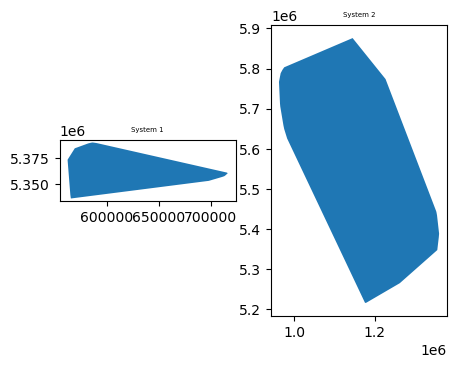

In [61]:
#Graficando los dos sistemas
from matplotlib import pyplot
fig, axs = pyplot.subplots(ncols=2,sharex=False, sharey=False,figsize=(5,5))
axs[0].set_title('System 1',fontsize=5)
SYSTEM1_hull.plot(ax=axs[0])

axs[1].set_title('System 2',fontsize=5)
SYSTEM2_hull.plot(ax=axs[1])

In [62]:
#Hacemos lo mismo con el segundo sistema
SYSTEM2_hull=gpd.GeoSeries(SYSTEM2.unary_union.convex_hull).to_frame()
SYSTEM2_hull.rename(columns={0:'geometry'},inplace=True)
SYSTEM2_hull=SYSTEM2_hull.set_geometry('geometry')
SYSTEM2_hull.crs="EPSG:6381"
#y verificamos:
SYSTEM1_hull.crs

<Projected CRS: EPSG:6381>
Name: UCS-2000 / Ukraine TM zone 7
Axis Info [cartesian]:
- X[north]: Northing (metre)
- Y[east]: Easting (metre)
Area of Use:
- name: Ukraine - west of 22°30'E.
- bounds: (22.15, 48.24, 22.5, 48.98)
Coordinate Operation:
- name: Ukraine TM zone 7
- method: Transverse Mercator
Datum: Ukraine 2000
- Ellipsoid: Krassowsky 1940
- Prime Meridian: Greenwich

In [63]:
#La distancia del primer sistema a cada aeropuerto es
distanceMatrixKM_sysHull_air=SYSTEM1_hull.geometry.apply\
(lambda g: airports_ukr_6381.set_index('airportName').geometry.distance(g)/1000).\
sort_index(axis=0).sort_index(axis=1)

distanceMatrixKM_sysHull_air

airportName  Aeroclub Swallow  Aerodrom Belz  Aerodrom Krupske  \
0                   48.099989     210.387808        111.110932   

airportName  Anan'iv Airstrip  Andrushivka  Artek Heliport  Artsyz Air Base  \
0                  259.800391   264.297564      724.552252       331.944284   

airportName  Askaniya-Nova Airport  Bagerovo Air Base  Bekhtery Airfield  ...  \
0                       578.475458         806.472802         487.619584  ...   

airportName  Zabroshennyy Airport  Zahnitkiv Airstrip  \
0                       281.44973          174.939219   

airportName  Zaporizhzhia International Airport  Zavodskoe Airfield  \
0                                    655.195021          684.780699   

airportName  Zhalizhnia  Zhovti Vody Airstrip  Zhovtneve Air Base  \
0            212.995931            510.521901          329.738035   

airportName  Zhovtneve Air Base 2  Zhytomyr Airport  Zmiyinyy Island Helipad  
0                      261.523753        274.642962                432.59077  

[1 rows x 247 columns]

In [64]:
#La mínima distancia es:
mins=distanceMatrixKM_sysHull_air.idxmin(axis="columns")
mins

0    Chernivtsi International Airport
dtype: object

In [65]:
#La máxima distancia es:
maxs=distanceMatrixKM_sysHull_air.idxmax(axis="columns")
maxs

0    Gostra Mogila Airfield
dtype: object

In [66]:
#Graficamos el hull con el aeropuerto más cercano de rojo, y los restantes de azul
base=SYSTEM1_hull.explore()
airports_ukr_6381[airports_ukr_6381.airportName.isin(mins)].explore(m=base,color='red',marker_kwds=dict(radius=10))
airports_ukr_6381[airports_ukr_6381.airportName.isin(maxs)].explore(m=base,color='blue',marker_kwds=dict(radius=5))


In [67]:
#La distancia del segundo sistema a cada aeropuerto es
distanceMatrixKM_sysHull_air2=SYSTEM2_hull.geometry.apply\
(lambda g: airports_ukr_6381.set_index('airportName').geometry.distance(g)/1000).\
sort_index(axis=0).sort_index(axis=1)

distanceMatrixKM_sysHull_air2

airportName  Aeroclub Swallow  Aerodrom Belz  Aerodrom Krupske  \
0                  370.407506     467.070458        482.223953   

airportName  Anan'iv Airstrip  Andrushivka  Artek Heliport  Artsyz Air Base  \
0                  137.920173   121.050347      256.879448       243.852782   

airportName  Askaniya-Nova Airport  Bagerovo Air Base  Bekhtery Airfield  ...  \
0                         44.89815          243.08306           32.21169  ...   

airportName  Zabroshennyy Airport  Zahnitkiv Airstrip  \
0                       77.283353          198.925744   

airportName  Zaporizhzhia International Airport  Zavodskoe Airfield  \
0                                      11.16907          212.064191   

airportName  Zhalizhnia  Zhovti Vody Airstrip  Zhovtneve Air Base  \
0             429.80616                   0.0          307.327947   

airportName  Zhovtneve Air Base 2  Zhytomyr Airport  Zmiyinyy Island Helipad  
0                       425.80383        132.189821               222.743258  

[1 rows x 247 columns]

In [68]:
#La mínima distancia es:
mins2=distanceMatrixKM_sysHull_air2.idxmin(axis="columns")
mins2

0    Boryspil International Airport
dtype: object

In [69]:
#La máxima distancia es:
maxs2=distanceMatrixKM_sysHull_air2.idxmax(axis="columns")
maxs2

0    Kosino Spa Resort
dtype: object

In [70]:
#Graficamos el hull con el aeropuerto más cercano de rojo, y los restantes de azul
base=SYSTEM2_hull.explore()
airports_ukr_6381[airports_ukr_6381.airportName.isin(mins2)].explore(m=base,color='red',marker_kwds=dict(radius=10))
airports_ukr_6381[airports_ukr_6381.airportName.isin(maxs2)].explore(m=base,color='blue',marker_kwds=dict(radius=5))


In [71]:
#Ejercicio 4
distanceMatrixKM_riv_air

airportName       Aeroclub Swallow  Aerodrom Belz  Aerodrom Krupske  \
NOMBRE                                                                
Danubio                 407.999649     632.247250        543.874886   
Desna                   382.177146     470.641629        484.839850   
Dnieper                 373.875873     467.101601        482.226685   
Dniester                 18.104121      93.768252          0.377571   
Goryn'                  115.109010     127.965349        115.282369   
Ingulets                487.601614     654.449467        633.790777   
Oskol                   840.819137     983.994124        978.648601   
Pripyat'                327.510191     113.246762        216.387579   
Prut                     52.381487     210.387808        111.110932   
Psel                    555.033283     705.887710        695.023596   
San                     230.336367     155.934215         92.499855   
Severskiy Donets        784.525232     913.468887        915.137995   
Severskiy Donets        763.005930     896.641331        895.810276   
Seym                    554.872421     618.448404        646.907164   
Siret                    73.919385     264.437345        172.008606   
Sluch'                  101.211413     186.567308        168.609472   
Sozh                    491.375632     513.459599        556.617447   
Teterev                 175.510691     291.815210        283.423652   
Tisza                   135.049293     228.107539        124.968076   
Yuzhnyy Bug              94.334707     222.173887        196.552821   

airportName       Anan'iv Airstrip  Andrushivka  Artek Heliport  \
NOMBRE                                                            
Danubio                 253.631286   510.502830      373.466037   
Desna                   323.927387   127.767829      729.201288   
Dnieper                 227.335477   121.050347      258.293189   
Dniester                125.188152   193.572835      348.603611   
Goryn'                  355.113162   151.396486      840.888001   
Ingulets                227.119223   301.360137      266.805581   
Oskol                   581.082689   622.472554      566.833768   
Pripyat'                392.476892   165.464640      794.885748   
Prut                    259.800391   264.297564      724.552252   
Psel                    307.191492   344.846463      504.946536   
San                     545.589244   453.473921     1005.665102   
Severskiy Donets        549.373513   554.240391      617.557949   
Severskiy Donets        522.623548   536.234459      557.992308   
Seym                    462.393552   300.587909      747.324582   
Siret                   296.072825   312.810433      745.891645   
Sluch'                  295.909175    87.767553      778.819171   
Sozh                    482.526535   252.962676      869.432884   
Teterev                 278.245869    25.819882      756.078724   
Tisza                   424.216362   388.568809      870.786768   
Yuzhnyy Bug              52.377391    76.545789      340.757865   

airportName       Artsyz Air Base  Askaniya-Nova Airport  Bagerovo Air Base  \
NOMBRE                                                                        
Danubio                 55.227880             340.760976         517.500357   
Desna                  522.271359             519.087731         718.418031   
Dnieper                244.256486              45.679276         245.030655   
Dniester                80.577930             252.282810         459.011459   
Goryn'                 500.454242             659.148636         884.451658   
Ingulets               275.681233              76.432126         305.117741   
Oskol                  708.732756             414.236759         427.135848   
Pripyat'               590.173258             583.238683         776.786636   
Prut                   331.944284             578.475458         806.472802   
Psel                   468.107001             292.459425         456.427581   
San           

In [72]:
#Escogemos un río
distanceMatrixKM_riv_air.loc['Dniester'].min()

0.37757058171212604

In [73]:
minMts=distanceMatrixKM_riv_air.loc['Dniester'].min()*20000

#Ahora utilizaremos un buffer
rios_ukr_638[rios_ukr_638.NOMBRE=='Dniester'].buffer(distance = minMts)

1    MULTIPOLYGON (((985695.107 5188369.859, 985413...
dtype: geometry

In [74]:
# El buffer es graficado de la siguiente manera
bufferAroundAmazon=rios_ukr_638[rios_ukr_638.NOMBRE=='Dniester'].buffer(distance = minMts)
bufferAsBase=bufferAroundAmazon.explore(color='red')
rios_ukr_638[rios_ukr_638.NOMBRE=='Dniester'].explore(m=bufferAsBase,color='blue',style_kwds={'weight':0.5})

In [75]:
#Y con los aeropuertos es así
rios_ukr_638[rios_ukr_638.NOMBRE=='Dniester'].explore(m=bufferAsBase,color='blue',style_kwds={'weight':0.5})
airports_ukr_6381.explore(m=bufferAsBase,color='black')

In [76]:
#Identificamos los aeropuertos dentro del buffer
riversWithinBuffer=airports_ukr_6381.clip(mask=bufferAroundAmazon)
riversWithinBuffer

airportName  Country  latitude_deg  longitude_deg  \
86   Pidverbtsi Airstrip  Ukraine     48.786820      25.217443   
115     Liubsha Air Base  Ukraine     49.288300      24.198299   
178     Aerodrom Krupske  Ukraine     49.451556      24.043866   
162      Sambir Air Base  Ukraine     49.549999      23.334999   

                           geometry  
86   POINT (609999.399 5414633.847)  
115  POINT (532776.600 5466741.770)  
178  POINT (520811.639 5484430.568)  
162  POINT (469082.118 5493543.696)

In [77]:
#Los graficamos
bufferAsBase=bufferAroundAmazon.explore(color='red')
rios_ukr_638[rios_ukr_638.NOMBRE=='Dniester'].explore(m=bufferAsBase,color='blue',style_kwds={'weight':0.5})
riversWithinBuffer.explore(m=bufferAsBase,color='black')

In [78]:
#La mínima distancia es
distanceMatrixKM_riv_air.min(axis=1).min() 

0.022843247602207368

In [79]:
#Ahora lo usamos para todos los ríos
minMinMts_5=5*distanceMatrixKM_riv_air.min(axis=1).min()*30000


allMinBuffer=rios_ukr_638.buffer(distance = minMinMts_5).explore(color='red')
rios_ukr_638.explore(m=allMinBuffer,color='blue',style_kwds={'weight':0.5})
airports_ukr_6381.explore(m=allMinBuffer,color='black')

In [80]:
#Todos los buffers po:
rios_ukr_638.buffer(distance = minMinMts_5)

0     POLYGON ((422305.644 5455254.058, 422316.829 5...
1     MULTIPOLYGON (((986308.547 5200048.985, 986540...
2     POLYGON ((561530.585 5377265.597, 561619.619 5...
3     POLYGON ((617297.945 5337878.286, 617268.503 5...
4     MULTIPOLYGON (((966040.408 5067598.667, 966197...
5     POLYGON ((1154305.669 5470594.984, 1155692.428...
6     POLYGON ((1211585.985 5526485.484, 1211585.844...
7     POLYGON ((974678.806 5646911.251, 974668.855 5...
8     POLYGON ((1101617.464 5770360.708, 1101841.953...
9     POLYGON ((958233.658 5765921.015, 958176.506 5...
10    POLYGON ((973513.887 5806718.587, 973522.610 5...
11    MULTIPOLYGON (((921932.889 5747304.085, 921982...
12    POLYGON ((795722.940 5540168.553, 795686.662 5...
13    MULTIPOLYGON (((1118315.268 5283169.139, 11182...
14    POLYGON ((623469.848 5529656.700, 623263.066 5...
15    POLYGON ((684796.207 5524664.380, 685064.258 5...
16    POLYGON ((1493439.668 5582203.896, 1493572.832...
17    MULTIPOLYGON (((1688981.340 5552089.737, 1

In [81]:
#Podemos observar que es una geoserie
riversAll_buf=rios_ukr_638.buffer(distance = minMinMts_5)
type(riversAll_buf)

geopandas.geoseries.GeoSeries

In [82]:
#Lo convertimos a un geodataframe
riversAll_bufDF=riversAll_buf.to_frame()
riversAll_bufDF.rename(columns={0:'geometry'},inplace=True)
riversAll_bufDF = riversAll_bufDF.set_geometry("geometry")
riversAll_bufDF.crs

<Projected CRS: EPSG:6381>
Name: UCS-2000 / Ukraine TM zone 7
Axis Info [cartesian]:
- X[north]: Northing (metre)
- Y[east]: Easting (metre)
Area of Use:
- name: Ukraine - west of 22°30'E.
- bounds: (22.15, 48.24, 22.5, 48.98)
Coordinate Operation:
- name: Ukraine TM zone 7
- method: Transverse Mercator
Datum: Ukraine 2000
- Ellipsoid: Krassowsky 1940
- Prime Meridian: Greenwich

In [83]:
#Estos son los aeropuertos que pertenecen a la zona del buffer de los ríos
allRiversWithinBuffs=airports_ukr_6381.clip(riversAll_bufDF)
allRiversWithinBuffs

airportName  Country  latitude_deg  longitude_deg  \
190             Iskrivka Airstrip  Ukraine     48.178770      33.354016   
205           Lysychansk Heliport  Ukraine     48.932300      38.409700   
224                 Reni Heliport  Ukraine     45.425540      28.290380   
194                Kiliya Airport  Ukraine     45.458866      29.287591   
208             Mamalyha Heliport  Ukraine     48.247700      26.584730   
177              Kornych Air Base  Ukraine     48.528999      25.125000   
195              Kolomiya Airport  Ukraine     48.550999      25.042000   
86            Pidverbtsi Airstrip  Ukraine     48.786820      25.217443   
178              Aerodrom Krupske  Ukraine     49.451556      24.043866   
162               Sambir Air Base  Ukraine     49.549999      23.334999   
34     Starokostiantyniv Air Base  Ukraine     49.748299      27.273300   
93                       Iziaslav  Ukraine     50.119643      26.868107   
53        Kyiv Challenge Heliport  Ukraine     50.406424      30.579473   
200            Hydropark Heliport  Ukraine     50.458134      30.568124   
5    Dnipro International Airport  Ukraine     48.357201      35.100601   
107                Dymer Airstrip  Ukraine     51.007103      29.978248   
187            Chоrnobil Heliport  Ukraine     51.285999      30.198999   

                            geometry  
190  POINT (1218028.379 5412725.292)  
205  POINT (1572798.574 5570131.814)  
224   POINT (870653.529 5058287.747)  
194   POINT (948299.393 5069594.529)  
208   POINT (714813.175 5361196.731)  
177   POINT (604760.590 5385600.122)  
195   POINT (598502.624 5387717.900)  
86    POINT (609999.399 5414633.847)  
178   POINT (520811.639 5484430.568)  
162   POINT (469082.118 5493543.696)  
34    POINT (752087.308 5531897.487)  
93    POINT (719666.562 5570795.921)  
53    POINT (980519.891 5630199.473)  
200   POINT (978969.838 5635831.382)  
5    POINT (1343783.385 5455169.126)  
107   POINT (929736.910 5691486.706)  
187   POINT (941287.027 5724348.157)

<Axes: >

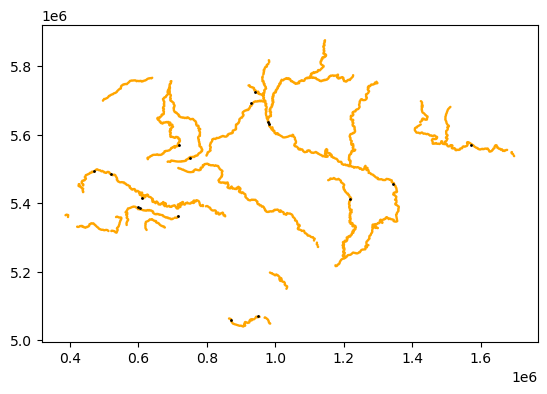

In [84]:
#Y los graficamos
base=riversAll_bufDF.plot(color='orange')
allRiversWithinBuffs.plot(ax=base, color='black', markersize=1)

In [85]:
#Ahora usamos folium
base=riversAll_bufDF.explore(color='orange')
allRiversWithinBuffs.explore(m=base, color='black')